Оригинальный скрипт: https://tirthajyoti.github.io/Notebooks/GAN_1D.html

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

In [29]:
def func(x):
  return (np.sin(x) / x) - (x/10)

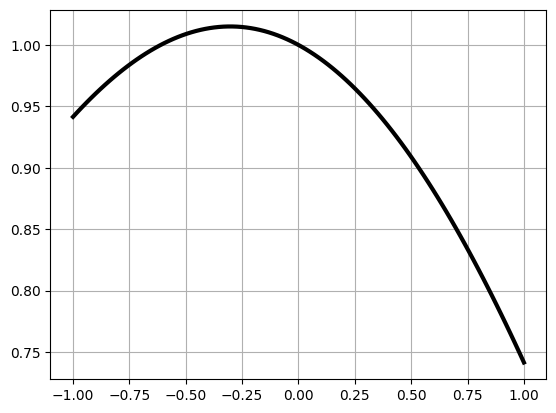

In [30]:
x = np.linspace(-1,1,100)

plt.plot(x,func(x),color='k',lw=3)
plt.grid(True)
plt.show()

In [31]:
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    # компиляция
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [32]:
# задаем дискриминатор модели
model_discriminator = define_discriminator()

# описание модели
model_discriminator.summary()

# сохраняем модель
# plot_model(model_discriminator, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)
# You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/)
# for plot_model to work.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               300       
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [36]:
def generate_real_samples(n,l=-1,h=1):
  x_1 = l + (h - l) * np.random.random(size=n)
  x_2 = func(x_1)

  x_1 = x_1.reshape(n, 1)
  x_2 = x_2.reshape(n, 1)
    
  x = np.hstack((x_1, x_2))
  y = np.ones((n, 1))
    
  return x, y

In [37]:
generate_real_samples(5)

(array([[ 0.98505796,  0.74743847],
        [ 0.80210123,  0.81595911],
        [-0.86130744,  0.966995  ],
        [ 0.94946826,  0.76143365],
        [ 0.53442791,  0.8996302 ]]),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [38]:
def generate_fake_samples(n,l=-1,h=1):
  x_1 = l + (h - l) * np.random.random(size=n)
  x_2 = l + (h - l) * np.random.random(size=n)
    
  x_1 = x_1.reshape(n, 1)
  x_2 = x_2.reshape(n, 1)
    
  x = np.hstack((x_1, x_2))
  y = np.zeros((n, 1))
    
  return x, y

In [39]:
generate_fake_samples(5)

(array([[ 0.32369953, -0.22558701],
        [ 0.12219531, -0.95643338],
        [ 0.35514042, -0.39611418],
        [-0.06545128, -0.46470136],
        [-0.45688054, -0.74212373]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [48]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        # генерируем настоящие семплы
        X_real, y_real = generate_real_samples(half_batch)
        # обновляем модель
        model.train_on_batch(X_real, y_real)
        # генерируем ложные семплы
        X_fake, y_fake = generate_fake_samples(half_batch)
        # обновляем модель
        model.train_on_batch(X_fake, y_fake)
        # оценка модели
        acc_real = model.evaluate(X_real, y_real, verbose=0)
        acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        print(i, acc_real, acc_fake)

In [49]:
train_discriminator(model_discriminator,n_epochs=20)
# округление!!! (потом)

0 [0.3906511962413788, 1.0] [0.6924772262573242, 0.59375]
1 [0.364825963973999, 1.0] [0.6504473686218262, 0.609375]
2 [0.37950319051742554, 1.0] [0.708145260810852, 0.546875]
3 [0.3612551689147949, 1.0] [0.6471472382545471, 0.609375]
4 [0.3575718402862549, 1.0] [0.6577824354171753, 0.59375]
5 [0.36249667406082153, 1.0] [0.6942107677459717, 0.46875]
6 [0.3526492118835449, 1.0] [0.6188953518867493, 0.65625]
7 [0.3569507598876953, 1.0] [0.5573384761810303, 0.71875]
8 [0.35718411207199097, 1.0] [0.5310050845146179, 0.703125]
9 [0.33744901418685913, 1.0] [0.5838071703910828, 0.71875]
10 [0.3263198137283325, 1.0] [0.6628503203392029, 0.5625]
11 [0.3370051681995392, 1.0] [0.5745842456817627, 0.6875]
12 [0.3490888476371765, 1.0] [0.6352273225784302, 0.59375]
13 [0.3347178101539612, 1.0] [0.6185166835784912, 0.65625]
14 [0.3096475601196289, 1.0] [0.6417551040649414, 0.59375]
15 [0.3296447992324829, 1.0] [0.538809597492218, 0.703125]
16 [0.3282623887062073, 1.0] [0.6422901153564453, 0.546875]
17

In [50]:
x_t, y_t = generate_fake_samples(5)
model_discriminator.evaluate(x_t, y_t)

1/1 [==============================] - 0s 66ms/step - loss: 0.4581 - accuracy: 0.6000


[0.4581441283226013, 0.6000000238418579]

In [51]:
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(50, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model

In [52]:
model_gen = define_generator(5)

model_gen.summary()

# plot_model(model_gen, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                300       
                                                                 
 dense_17 (Dense)            (None, 2)                 102       
                                                                 
Total params: 402
Trainable params: 402
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
# генерируем точки скрытого пространства как input для генератора
def generate_latent_points(latent_dim, n,l=-1,h=1):
    x_input = l + (h - l) * np.random.random(size=latent_dim * n)
    x_input = x_input.reshape(n, latent_dim)
    
    return x_input

In [56]:
def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input, verbose=0)
    plt.scatter(X[:, 0], X[:, 1],color='k',s=15)
    
    plt.show()

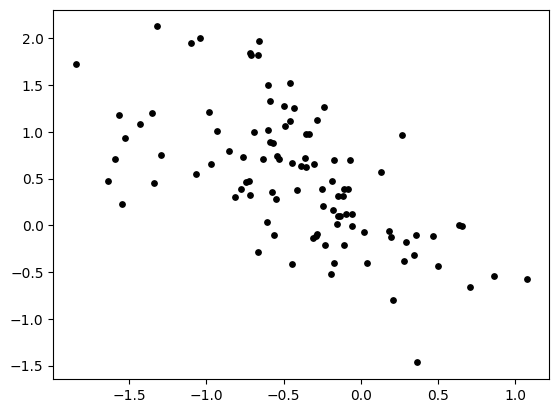

In [57]:
latent_dim = 5
model_gen = define_generator(latent_dim)

generate_fake_samples(model_gen, latent_dim, 100)

In [58]:
def generate_fake_samples(generator, latent_dim, n):
    # генерируем точки в скрытом пространстве
    x_input = generate_latent_points(latent_dim, n)
    # делаем предсказание
    X = generator.predict(x_input, verbose=0)
    # создаем лейблы класса
    y = np.zeros((n, 1))
    return X, y

In [59]:
# комбинируем генератор и дискриминатор
def full_gan(generator, discriminator):
    # веса не тренируемые
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [60]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
model_gan = full_gan(generator, discriminator)
model_gan.summary()

# plot_model(model_gan, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_14 (Sequential)  (None, 2)                 402       
                                                                 
 sequential_13 (Sequential)  (None, 1)                 401       
                                                                 
Total params: 803
Trainable params: 402
Non-trainable params: 401
_________________________________________________________________


In [61]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=500):
    x_real, y_real = generate_real_samples(n)
    acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    print ("Data comparison after {} epochs".format(epoch+1))
    print()
    print("Accuracy for the real data: {}, Accuracy for the fake data: {}".format(acc_real, acc_fake))
    print()
    plt.scatter(x_real[:, 0], x_real[:, 1], color='darkorange')
    plt.scatter(x_fake[:, 0], x_fake[:, 1], color='teal')
    plt.show()
    print()

In [62]:
# тренировка дискриминатора и генератора
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=256, n_eval=1000):
    half_batch = int(n_batch / 2)

    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)
        
        if (i+1) % n_eval == 0:
            summarize_performance(i, g_model, d_model, latent_dim)

In [63]:
# Задаём параметры и создаём финальную модель

latent_dim = 5

discriminator = define_discriminator()
generator = define_generator(latent_dim)

model_gan = full_gan(generator, discriminator)

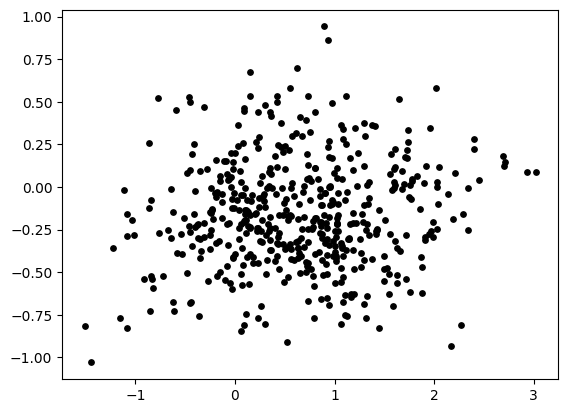

In [64]:
n=500
x,_=generate_fake_samples(generator, latent_dim, n)
plt.scatter(x[:,0],x[:,1],color='k',s=15)
plt.show()

Data comparison after 1000 epochs

Accuracy for the real data: [0.698718786239624, 0.5180000066757202], Accuracy for the fake data: [0.9002406597137451, 0.00800000037997961]



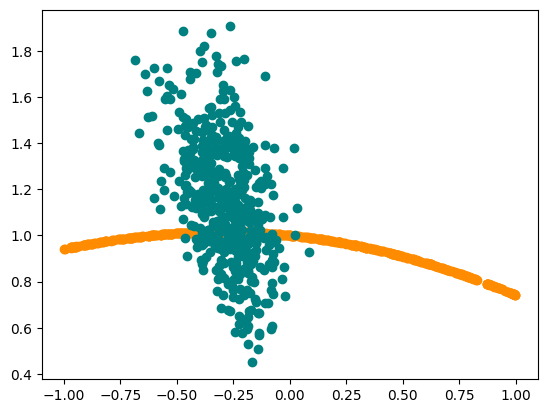


Data comparison after 2000 epochs

Accuracy for the real data: [0.5622230172157288, 0.6100000143051147], Accuracy for the fake data: [0.5171650052070618, 0.9900000095367432]



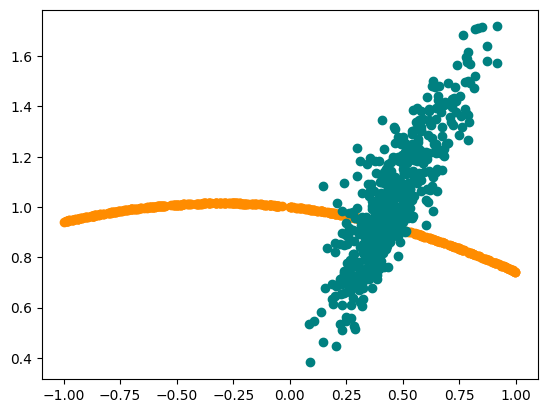


Data comparison after 3000 epochs

Accuracy for the real data: [0.8686093688011169, 0.19200000166893005], Accuracy for the fake data: [0.7865689992904663, 0.24799999594688416]



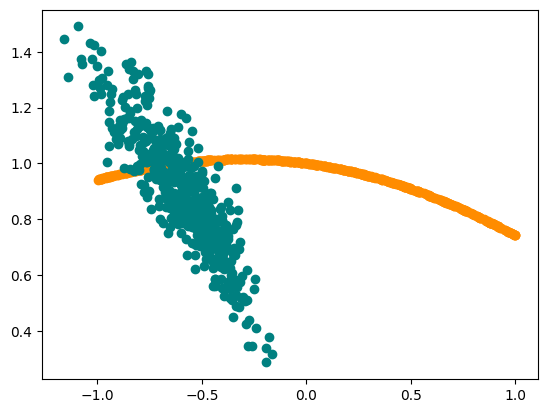


Data comparison after 4000 epochs

Accuracy for the real data: [0.6683841943740845, 0.5019999742507935], Accuracy for the fake data: [0.7490183711051941, 0.4880000054836273]



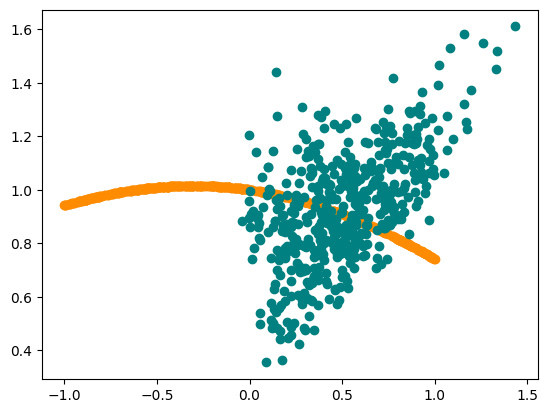


Data comparison after 5000 epochs

Accuracy for the real data: [0.6930912137031555, 0.46000000834465027], Accuracy for the fake data: [0.6739451885223389, 0.7160000205039978]



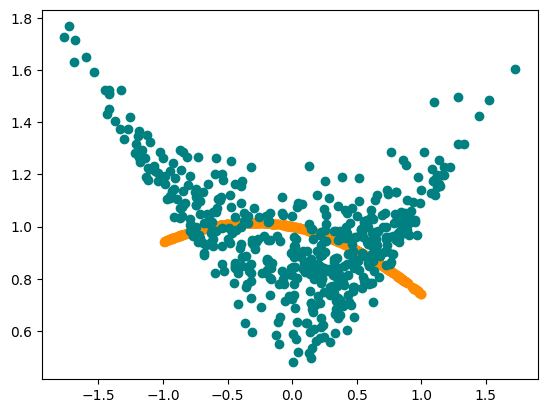


Data comparison after 6000 epochs

Accuracy for the real data: [0.6954340934753418, 0.36800000071525574], Accuracy for the fake data: [0.6839690804481506, 0.6840000152587891]



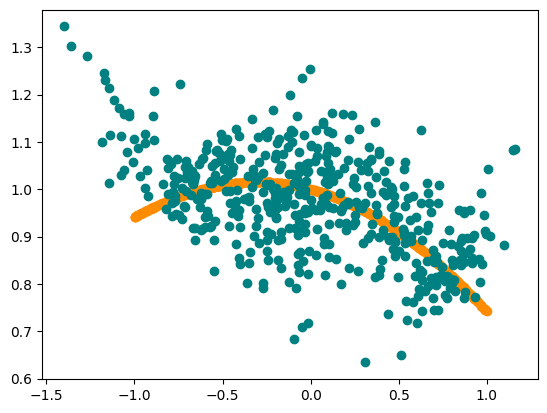


Data comparison after 7000 epochs

Accuracy for the real data: [0.6874962449073792, 0.5600000023841858], Accuracy for the fake data: [0.6934778094291687, 0.5059999823570251]



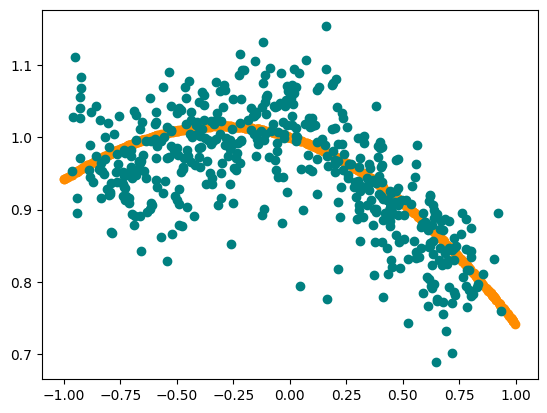


Data comparison after 8000 epochs

Accuracy for the real data: [0.693770170211792, 0.4399999976158142], Accuracy for the fake data: [0.6975184082984924, 0.5419999957084656]



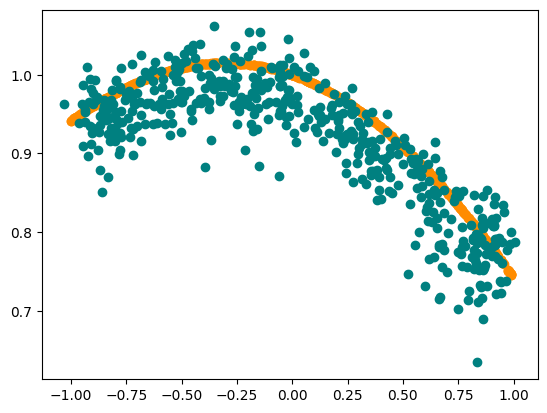


Data comparison after 9000 epochs

Accuracy for the real data: [0.6771678924560547, 0.46799999475479126], Accuracy for the fake data: [0.7109550833702087, 0.5120000243186951]



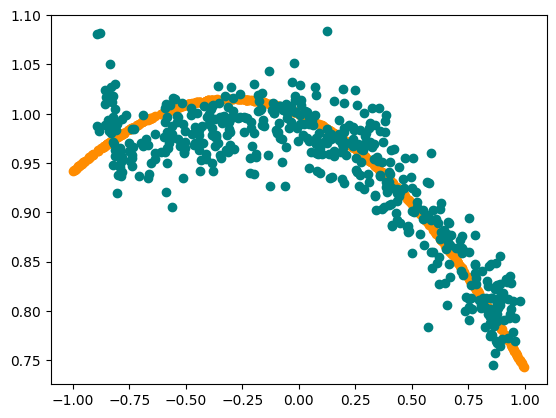


Data comparison after 10000 epochs

Accuracy for the real data: [0.6890625357627869, 0.5820000171661377], Accuracy for the fake data: [0.6950453519821167, 0.47999998927116394]



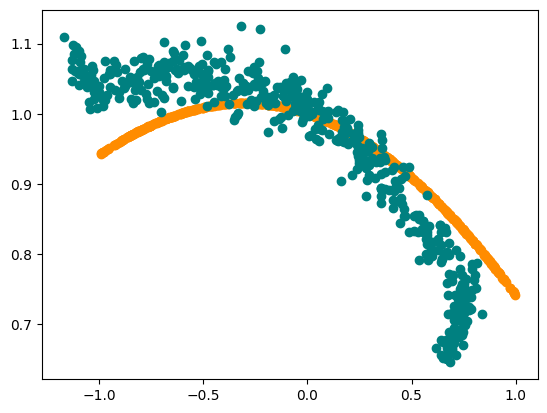

In [65]:
# train model
train(generator, discriminator, model_gan, latent_dim)

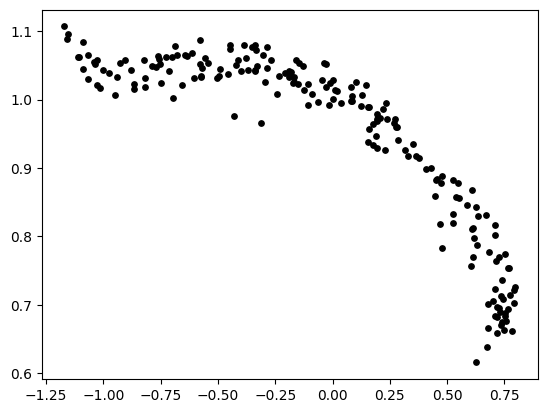

In [66]:
latent_dim=5
n=200
x,_=generate_fake_samples(generator, latent_dim, n)
plt.scatter(x[:,0],x[:,1],color='k',s=15)
plt.show()